<a href="https://colab.research.google.com/github/nilanjanmanna01/tensorflow_practice/blob/main/CNN_MNIST_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
# 60000 imgaes with 28,28 size for x_train

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

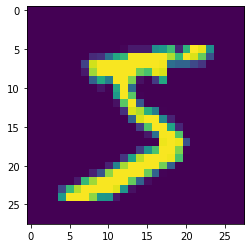

In [10]:
# Show 1 image using matplotlib imshow
plt.imshow(x_train[0])

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
# We need to classify the y_train

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_example = to_categorical(y_train,num_classes=10)

In [15]:
y_example.shape

(60000, 10)

In [16]:
# Showing that the first value falls in 5 category
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
y_cat_train = to_categorical(y_train,num_classes=10)

In [18]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [19]:
# We should scale the data from (0 to 255) to (0 to 1)
# We can use sklearn minmax scaler, but in this case just dividing by 255 will work
# The approach will work since any future image will also have value from 0 to 255

In [20]:
x_train = x_train/255
y_train = y_train/255

In [21]:
x_train[0].max()

1.0

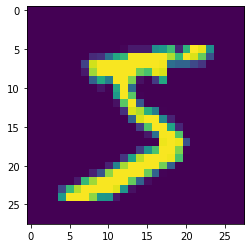

In [22]:
plt.imshow(x_train[0])

In [23]:
x_train.shape

(60000, 28, 28)

In [24]:
# We still need to add one more dimension. Since we are dealing with grey images we will have only 1 channel

In [25]:
# batch_size,width,height,color_channel
x_train = x_train.reshape(60000,28,28,1)

In [26]:
x_test.shape

(10000, 28, 28)

In [27]:
x_test = x_test.reshape(10000,28,28,1)

In [28]:
# Model creation

In [29]:
from tensorflow.keras.models import Sequential

In [30]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [60]:
model = Sequential()

# First layer is convolutional
# We didn't add any padding since we are covering all pixels using our kernel_size and strides (28/4 = 7)
model.add(Conv2D(filters=128,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

# Pooling layer is next. We will opt for default (2,2)
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten layer to flatten out the images - (28 by 28 image in a single array = 28*28 = 784)
model.add(Flatten())

# Dense layer. We usually add power of 2. We can add more than 1 dense layer
model.add(Dense(256,activation='relu'))

# Output layer (1 neuron per class for classification problem, also we will use softmax activation since it's a multi-class problem
# We have 10 possible classes - 0 to 9
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [63]:
len(x_train)

60000

In [64]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 143s 76ms/step - loss: 0.2228 - accuracy: 0.9318 - val_loss: 14.0990 - val_accuracy: 0.9769
Epoch 2/10
1875/1875 [==============================] - 140s 75ms/step - loss: 0.0376 - accuracy: 0.9882 - val_loss: 14.3704 - val_accuracy: 0.9789


In [65]:
x_train.shape

(60000, 28, 28, 1)

In [66]:
y_cat_train.shape

(60000, 10)

In [67]:
metrics = pd.DataFrame(model.history.history)

In [68]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.109224,0.966983,14.099010,0.9769
1,0.036169,0.988483,14.370359,0.9789


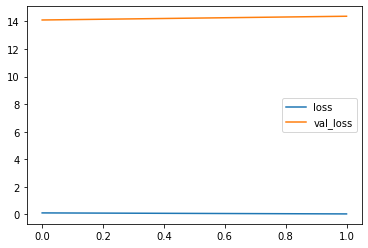

In [69]:
metrics[['loss','val_loss']].plot()

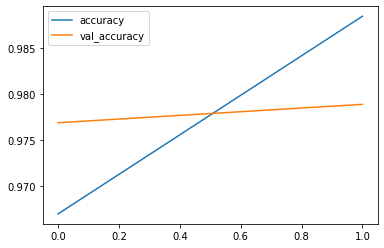

In [70]:
metrics[['accuracy','val_accuracy']].plot()

In [71]:
model.evaluate(x_test,y_cat_test,verbose=0)

[14.370359420776367, 0.9789000153541565]

In [72]:
from sklearn.metrics import classification_report,confusion_matrix

In [73]:
predictions = (model.predict(x_test) > 0.5).astype("int32")

In [74]:
y_cat_test.shape

(10000, 10)

In [75]:
predictions

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [78]:
print(classification_report(y_cat_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.96      0.98      0.97       974
           9       0.99      0.94      0.96      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000
 samples avg       0.98      0.98      0.98     10000



In [83]:
confusion_matrix(y_cat_test,predictions)

ValueError: ignored

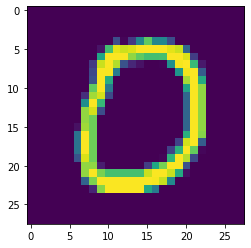

In [90]:
plt.imshow(x_test[10].reshape(28,28))

In [91]:
# How to test with an image 
# Shape should be (#image,width,height,channel)
(model.predict(x_test[10].reshape(1,28,28,1)) > 0.5).astype("int32")

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [88]:
x_test[0].shape

(28, 28, 1)